In [2]:
import pandas as pd
import numpy as np

In [61]:
data=pd.read_excel('/Users/dehilinesma/Downloads/example_data_cleaning.xlsx')
data

,TransactionID,ClientID,BirthYear,Amount,Profession,Department,Risk
0,1,34982,2013.000000,12900,Student,78,Low
1,2,34983,2015.000000,1230,barmen,78,High
2,3,34984,1945.000000,3450,student,78,Medium
3,4,34985,1923.000000,5670,manager,78,Low
4,5,34986,1978.000000,7890,hr,78,High
5,6,34987,1967.000000,10110,Manager,78,Medium
6,15,34987,1967.000000,30090,Manager,78,Low
7,22,34987,NaN,18990,sailer,78,High
8,7,34988,NaN,12330,Manager,78,Medium
9,23,34988,1999.000000,25650,Manager,78,Low


In [30]:
mv=data.isna().sum()
mv

TransactionID    0
ClientID         0
BirthYear        2
Amount           0
Profession       2
Department       0
Risk             0
dtype: int64

In [31]:
stat=data.describe()
stat

,TransactionID,ClientID,BirthYear,Amount,Department
count,30.000000,30.000000,28.000000,3.000000e+01,30.0
mean,15.500000,34993.833333,1968.316327,1.010097e+05,78.0
std,8.803408,8.132876,27.963867,4.342616e+05,0.0
min,1.000000,34982.000000,1923.000000,1.230000e+03,78.0
25%,8.250000,34987.250000,1944.714286,1.233000e+04,78.0
50%,15.500000,34991.500000,1967.000000,1.899000e+04,78.0
75%,22.750000,34999.750000,1988.000000,2.953500e+04,78.0
max,30.000000,35008.000000,2017.000000,2.399090e+06,78.0


In [32]:
data.duplicated().any()

False

In [34]:

data.drop('Department', axis=1, inplace=True)


In [37]:
data['Profession']

0         Student
1          barmen
2         student
3         manager
4              hr
5         Manager
6         Manager
7          sailer
8         Manager
9         Manager
10             HR
11             HR
12        Manager
13            BDM
14            BDM
15     researcher
16      professor
17         Driver
18    Hairdresser
19      developer
20       etudient
21       etudient
22         barmen
23        student
24        manager
25             HR
26       etudient
27            bdm
28            NaN
29            NaN
Name: Profession, dtype: object

In [52]:
#data.replace(('etudient', 'Student'),('hr','HR'),('student', 'Student'),('manager', 'Manager'),('bdm','BDM'))`

df=data.replace({'Profession' : { 'etudient' : 'Student', 
                              'hr' : 'HR', 
                              'manager': 'Manager',
                              'bdm':'BDM',
                              'student' : 'Student' }})


In [53]:
df['Profession'].ffill(inplace=True)
df

,TransactionID,ClientID,BirthYear,Amount,Profession,Risk
0,1,34982,2013.000000,12900,Student,Low
1,2,34983,2015.000000,1230,barmen,High
2,3,34984,1945.000000,3450,Student,Medium
3,4,34985,1923.000000,5670,Manager,Low
4,5,34986,1978.000000,7890,HR,High
5,6,34987,1967.000000,10110,Manager,Medium
6,15,34987,1967.000000,30090,Manager,Low
7,22,34987,NaN,18990,sailer,High
8,7,34988,NaN,12330,Manager,Medium
9,23,34988,1999.000000,25650,Manager,Low


In [63]:
df.at[7,'BirthYear']=1967
df.at[8,'BirthYear']=1999
df

,TransactionID,ClientID,BirthYear,Amount,Profession,Risk
0,1,34982,2013.000000,12900,Student,Low
1,2,34983,2015.000000,1230,barmen,High
2,3,34984,1945.000000,3450,Student,Medium
3,4,34985,1923.000000,5670,Manager,Low
4,5,34986,1978.000000,7890,HR,High
5,6,34987,1967.000000,10110,Manager,Medium
6,15,34987,1967.000000,30090,Manager,Low
7,22,34987,1967.000000,18990,sailer,High
8,7,34988,1999.000000,12330,Manager,Medium
9,23,34988,1999.000000,25650,Manager,Low


<AxesSubplot:>

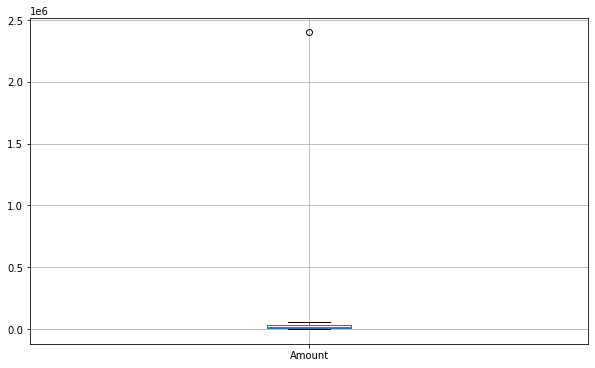

In [64]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
data.boxplot(column=['Amount'])

In [65]:
def printColumnTypes(non_numeric_df, numeric_df):
    '''separates non-numeric and numeric columns'''
    print("Non-Numeric columns:")
    for col in non_numeric_df:
        print(f"{col}")
    print("")
    print("Numeric columns:")
    for col in numeric_df:
        print(f"{col}")